In [1]:
import pandas as pd
import numpy as np
import keras
from keras.utils.data_utils import get_file
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from os.path import join
import multiprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis, tvar, entropy, pearsonr
import keras.backend.tensorflow_backend as K

%matplotlib inline

Using TensorFlow backend.


In [2]:
# DATA_HOME = '../lfw-aligned-cropped/'

DATA_HOME = '../lfw-aligned-with-32-margin-resized/'

In [3]:
PAIRS_PATH = '../pairs.txt'

In [4]:
raw_dataset = pd.read_csv(PAIRS_PATH, nrows=None)
raw_dataset.columns = ['data']

In [5]:
raw_dataset.shape

(6000, 1)

In [6]:
raw_dataset = raw_dataset

In [7]:
def split_raw_data(row):
    fields = str(row[0]).split('\t')
    is_the_same = 0
    path1, path2 = '{}/{}_{:04d}.png', '{}/{}_{:04d}.png'
    if len(fields) == 3:
        is_the_same = 1
        path1 = path1.format(fields[0], fields[0], int(fields[1]))
        path2 = path2.format(fields[0], fields[0], int(fields[2]))
    elif len(fields) == 4:
        path1 = path1.format(fields[0], fields[0], int(fields[1]))
        path2 = path2.format(fields[2], fields[2], int(fields[3]))
    else:
        raise(Exception('invalid fields'))
    
    return pd.Series([path1, path2, is_the_same], ['path1', 'path2', 'is_the_same']) 

In [8]:
dataset = raw_dataset.apply(split_raw_data, axis=1)

In [9]:
dataset.head()

,path1,path2,is_the_same
0,Abel_Pacheco/Abel_Pacheco_0001.png,Abel_Pacheco/Abel_Pacheco_0004.png,1
1,Akhmed_Zakayev/Akhmed_Zakayev_0001.png,Akhmed_Zakayev/Akhmed_Zakayev_0003.png,1
2,Akhmed_Zakayev/Akhmed_Zakayev_0002.png,Akhmed_Zakayev/Akhmed_Zakayev_0003.png,1
3,Amber_Tamblyn/Amber_Tamblyn_0001.png,Amber_Tamblyn/Amber_Tamblyn_0002.png,1
4,Anders_Fogh_Rasmussen/Anders_Fogh_Rasmussen_00...,Anders_Fogh_Rasmussen/Anders_Fogh_Rasmussen_00...,1


In [10]:
dataset.shape

(6000, 3)

In [11]:
def path2ImgVec(path):
#     x = img_to_array(load_img(join(DATA_HOME, path)))
    x = img_to_array(load_img(join(DATA_HOME, path)).convert('L'))
    return x.reshape((1,) + x.shape)

In [12]:
img_paths = list(set(dataset.path1.tolist()+dataset.path2.tolist()))
len(img_paths)

7701

In [13]:
pool = multiprocessing.Pool(8)
results = pool.map(path2ImgVec, img_paths)
pool.close()
pool.join()

In [14]:
img_vecs = np.vstack(results)
img_vecs.shape

(7701, 55, 47, 1)

In [15]:
input_shape = img_vecs.shape[1:]
img_vecs.shape

(7701, 55, 47, 1)

In [16]:
from keras.models import load_model

# model = load_model('../models/facescrub-faceonly-simple-cnn.model.h5')
# 0.250667	0.014855	0.240852	0.003922

# model = load_model('../models/webface-simple-cnn.3348.model.h5')
# 0.258	0.012423	0.247926	0.001509

# model = load_model('../models/webface-simple-cnn.aligned.margin16.model.h5')
# 0.188000	0.009123	0.174352	0.001018

# model = load_model('../models/webface-simple-cnn.aligned.margin32-1.model.h5')
# 0.158667	0.009684	0.149889	0.001223

# model = load_model('../models/webface-facescrub-faceonly-simple-cnn.aligned.model.h5')
# 0.146333	0.015720	0.137333	0.002688

# model = load_model('../models/webface-facescrub-faceonly-simple-cnn.aligned.selected.model.h5')
# 0.149667	0.012601	0.119389	0.002129

# model = load_model('../models/webface-facescrub-faceonly-simple-cnn.aligned.augment.model.h5')

# model = load_model('../models/webface-facescrub-faceonly-simple-cnn.aligned.flipped.model.h5')
# with <6 augmentation
# 0.131	0.010220	0.099037	0.002640

# model = load_model('../models/webface-full-simple-cnn.aligned.margin32.model.h5')
# about 60% data ?
# 0.111667	0.011571	0.099852	0.002124
# All data
#*0.102500	0.011908	0.065889	0.001608

# model = load_model('../models/webface-full-simple-cnn.aligned.margin32.s20.model.h5')
# 0.100333	0.013392	0.082704	0.001788

# model = load_model('../models/webface-full-simple-cnn.aligned.margin32.grey.model.h5')
# All data
# 0.114000	0.012936	0.094685	0.001828
# All data + flipped
# 0.106500	0.011772	0.081500	0.002122
# 0.105167	0.010735	0.089592	0.001551

# model = load_model('../models/celeba-full-simple-cnn.aligned.margin32.model.h5')
# 0.139167 	0.018488 	0.131982 	0.002264

# model = load_model('../models/celeba-full-simple-cnn.aligned.margin32.flipped.model.h5')
# 0.126500 	0.009957 	0.114055 	0.002217

# model = load_model('../models/webface-full-celeba-simple-cnn.aligned.margin32.grey.model.h5')
# 0.107333	0.013085	0.089500	0.001393

model = load_model('../models/webface-full-celeba-simple-cnn.aligned.margin32.grey.flipped.s20.model.h5')
# 0.101000	0.013646	0.088574	0.002227
# 0.098667	0.014020	0.082630	0.001580
# 0.098333	0.013333	0.082704	0.001736
# 0.100500	0.009547	0.090111	0.001466
# 0.093667	0.010214	0.065185	0.001320

In [17]:
from keras import backend as K
inp = model.input
# outputs = [layer.output for layer in model.layers]
outputs = [model.layers[-2].output]
functor = K.function([inp] + [K.learning_phase()], outputs)

In [18]:
deepids = functor([img_vecs, 1.])[0]

In [19]:
deepids.shape

(7701, 160)

In [20]:
img_deepid_mem = {k:v for k, v in zip(img_paths, deepids)}

In [21]:
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis

COL_NAMES = [
    "z_cosine",
#     'z_cityblock',
#     'z_jaccard',
#     "z_canberra",
#     "z_euclidean",
#     "z_minkowski",
#     "z_braycurtis",
    'z_skew1',
    'z_skew2',
    'z_kurtosis1',
    'z_kurtosis2',
    'z_tvar1',
    'z_tvar2',
] + ['is_the_same']

def to_deepid_features(row):
    vec1 = img_deepid_mem[row['path1']]
    vec2 = img_deepid_mem[row['path2']]

    feats = [
        cosine(vec1, vec2),
#         cityblock(vec1, vec2),
#         jaccard(vec1, vec2),
#         canberra(vec1, vec2),
#         euclidean(vec1, vec2),
#         minkowski(vec1, vec2, 3),
#         braycurtis(vec1, vec2),
        skew(vec1),
        skew(vec2),
        kurtosis(vec1),
        kurtosis(vec2),
        tvar(vec1),
        tvar(vec2),
    ]
    
    return pd.Series(feats + [row['is_the_same']], COL_NAMES) 

In [22]:
feat_dataset = dataset.apply(to_deepid_features, axis=1)

In [23]:
feat_dataset.head()

,z_cosine,z_skew1,z_skew2,z_kurtosis1,z_kurtosis2,z_tvar1,z_tvar2,is_the_same
0,0.496965,1.150352,1.063539,0.344259,0.026066,8.101951,6.577006,1.0
1,0.168039,1.330074,1.334253,1.174846,1.180206,10.566022,10.675787,1.0
2,0.357253,1.425131,1.334253,1.404630,1.180206,8.155128,10.675787,1.0
3,0.250534,1.562096,1.190631,2.249466,0.458319,11.160974,11.856462,1.0
4,0.269458,1.040103,1.483924,0.018788,1.475982,6.329705,15.493348,1.0


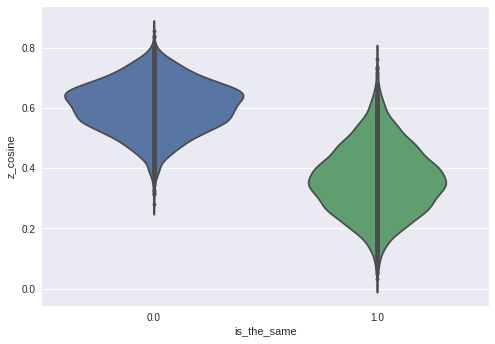

In [24]:
import seaborn as sns

sns.violinplot(data=feat_dataset, x='is_the_same', y='z_cosine', inner="points")

In [25]:
col = [c for c in feat_dataset.columns if c[0]=='z']

X = feat_dataset[col].as_matrix()
y = feat_dataset['is_the_same'].as_matrix()

In [26]:
X[0]

array([ 0.49696462,  1.15035188,  1.06353915,  0.34425919,  0.02606576,
        8.10195103,  6.5770056 ])

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

In [28]:
import xgboost as xgb
params = {}
params["objective"] = "binary:logistic"
params['eval_metric'] = ['logloss', 'error']
# params["eta"] = 0.02
# params["subsample"] = 0.7
# params["min_child_weight"] = 1
# params["colsample_bytree"] = 0.7
params["max_depth"] = 4
# params["silent"] = 1
params["seed"] = 1632

d_train = xgb.DMatrix(X_train, label=y_train)
d_valid = xgb.DMatrix(X_valid, label=y_valid)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
bst = xgb.train(params, d_train, 500, watchlist, early_stopping_rounds=50, verbose_eval=100)

[0]	train-logloss:0.512492	train-error:0.091111	valid-logloss:0.517335	valid-error:0.113333
Multiple eval metrics have been passed: 'valid-error' will be used for early stopping.

Will train until valid-error hasn't improved in 50 rounds.
[100]	train-logloss:0.100758	train-error:0.032963	valid-logloss:0.232984	valid-error:0.093333
Stopping. Best iteration:
[63]	train-logloss:0.131727	train-error:0.048148	valid-logloss:0.227365	valid-error:0.083333



In [29]:
d_all = xgb.DMatrix(X, label=y)

xgb.cv(params, d_all, 500, nfold=10, metrics=['error'], shuffle=False, early_stopping_rounds=50, seed=42)

,test-error-mean,test-error-std,train-error-mean,train-error-std
0,0.103500,0.013893,0.092648,0.002207
1,0.102167,0.015331,0.089667,0.001236
2,0.101500,0.014092,0.088148,0.001171
3,0.098667,0.012841,0.086648,0.000715
4,0.098000,0.012512,0.085259,0.000865
5,0.097167,0.011476,0.083444,0.001058
6,0.097333,0.013338,0.083037,0.001212
7,0.096667,0.012737,0.082463,0.001111
8,0.095167,0.011936,0.081241,0.001465
9,0.094500,0.011379,0.080500,0.001371
